In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import root_mean_squared_error

In [39]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape , y_test.shape

((156,), (12,))

In [40]:
result = adfuller(y,maxlag=10)
print("P-value",result[1])
if result[1]<0.05:
    print("Time series is stationary")
else:
    print("Time series is not stationary")

P-value 0.6443832606930102
Time series is not stationary


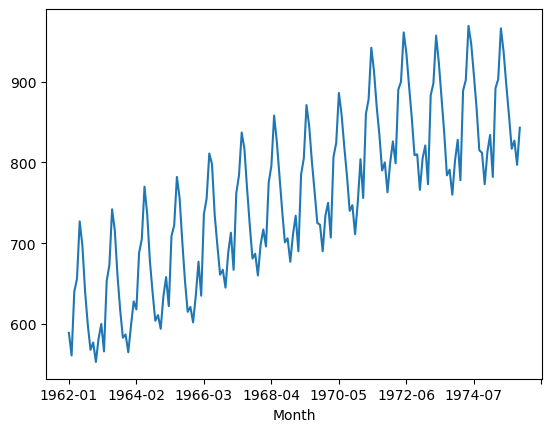

In [41]:
y.plot()
plt.show()

#### 1st order differencing

In [5]:
result = adfuller(y.diff()[1:],maxlag=10)
print("P-value",result[1])
if result[1]<0.05:
    print("Time series is stationary")
else:
    print("Time series is not stationary")

P-value 0.0
Time series is stationary


#### After you do differencing you can achieve stationary series

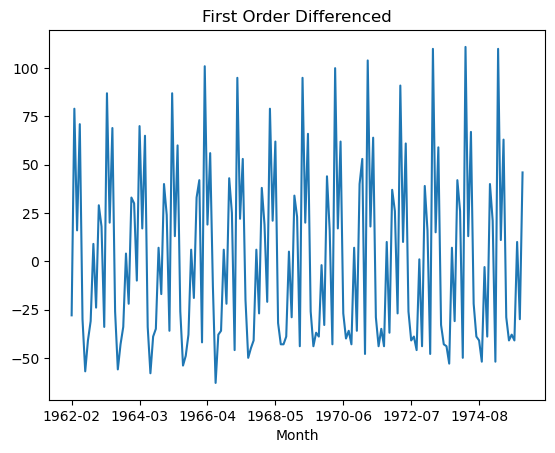

In [6]:
y.diff()[1:].plot()
plt.title('First Order Differenced')
plt.show()

#### Auto-correlation graph

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

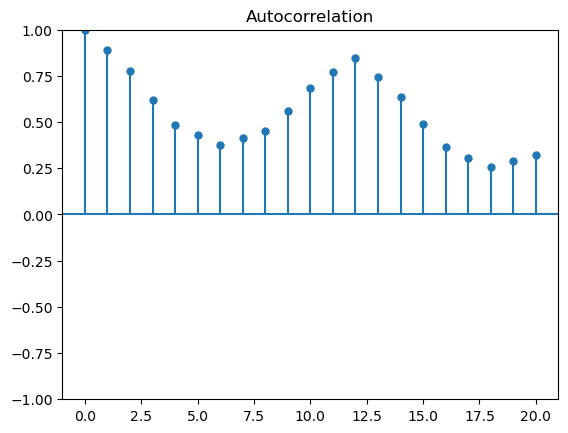

In [8]:
plot_acf(y,lags=20,alpha=None)
plt.show()

## Coal Consumption Dataset

In [9]:
coal = pd.read_csv('Coal Consumption.csv',index_col=0)

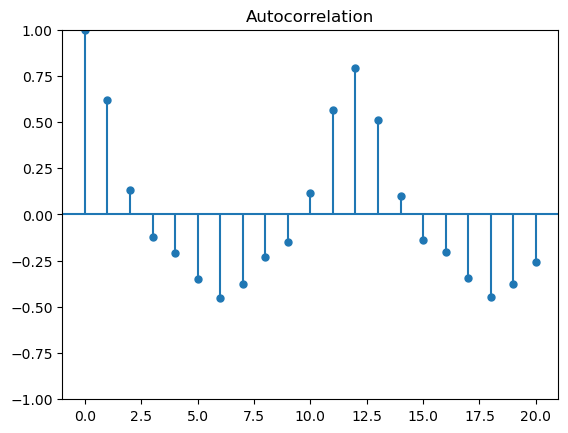

In [10]:
# This plot is called as needle plot
plot_acf(coal['Amount'],lags=20,alpha=None)
plt.show()

####  AR Model

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape , y_test.shape

((156,), (12,))

In [13]:
model = ARIMA(y_train , order = (1,0,0),freq='MS')
model_fit = model.fit()
model_fit.params

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      741.622665
ar.L1        0.900561
sigma2    1933.729258
dtype: float64

In [14]:
y_train.shape

(156,)

In [15]:
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

98.7546080336063

In [16]:
y_test.index = y_pred.index

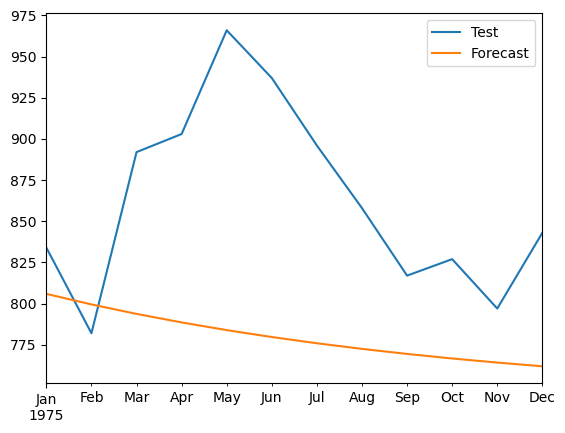

In [17]:
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

In [18]:
diff1 = y.diff()[1:]

In [19]:
train = diff1[:156]
test = diff1[156:]

In [20]:
model = ARIMA(train , order = (1,0,0),freq='MS')
model_fit = model.fit()
model_fit.params

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const        1.569258
ar.L1        0.038679
sigma2    2016.088713
dtype: float64

In [21]:
train.shape

(156,)

In [22]:
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)

50.209197681027185

In [23]:
test.index = y_pred.index

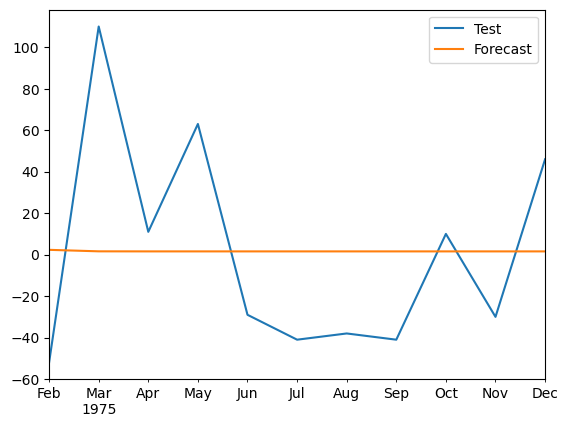

In [24]:
test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

#### giving d=1 in order for 1st order differenciation

In [25]:
model = ARIMA(train , order = (1,1,0),freq='MS')
model_fit = model.fit()

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
train.shape

(156,)

In [27]:
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)

58.21930540531557

In [28]:
test.index = y_pred.index

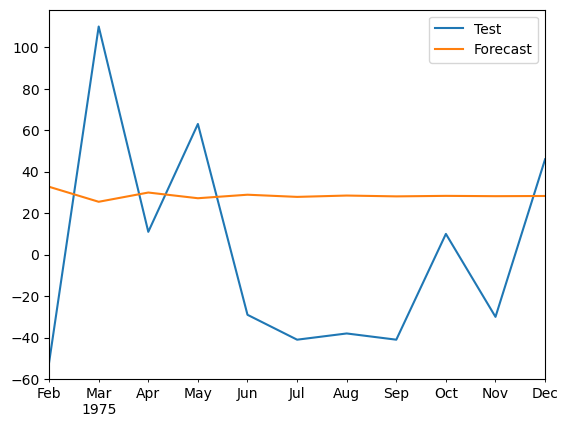

In [29]:
test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

In [30]:
model = ARIMA(train , order = (12,1,0),freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6.47764592990069

In [31]:
test.index = y_pred.index

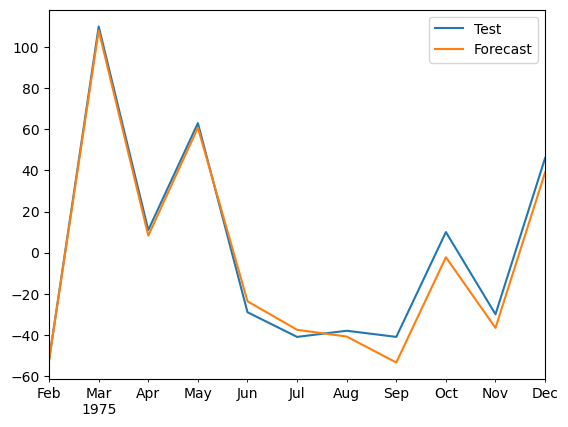

In [32]:
test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

#### MA model

In [33]:
model = ARIMA(train , order = (0,0,1),freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


50.187360119066746

#### ARMA Model 

In [34]:
model = ARIMA(train , order = (1,0,1),freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


50.2163915219831

## SARIMA

In [36]:
model = ARIMA(train , order = (3,1,0),freq='MS',seasonal_order=(1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
root_mean_squared_error(test,y_pred)


C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


6.827493133468838

### pmdarima

In [43]:
from pmdarima.arima import auto_arima

In [45]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.691, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.571, Time=0.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.631, Time=1.09 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 s

#### AIC: Akaike's Information Criterion (Equivalent to mean squared error) Lower the better

In [47]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

60.723396992885554

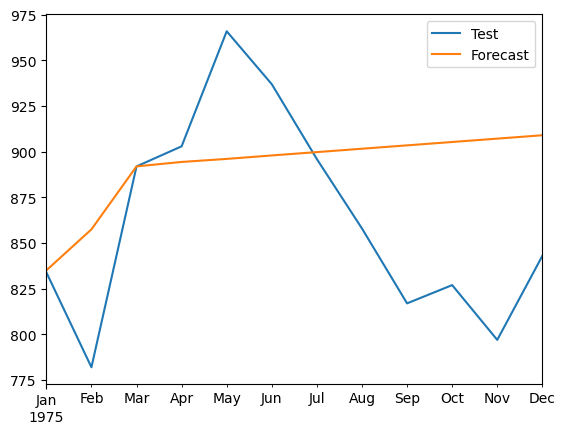

In [48]:
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

#### SARIMA (auto)

In [51]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=2.02 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.49 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.47 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=3.66 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.25 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.42 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.87 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.26 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.13 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.57 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [52]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

13.941102797547243

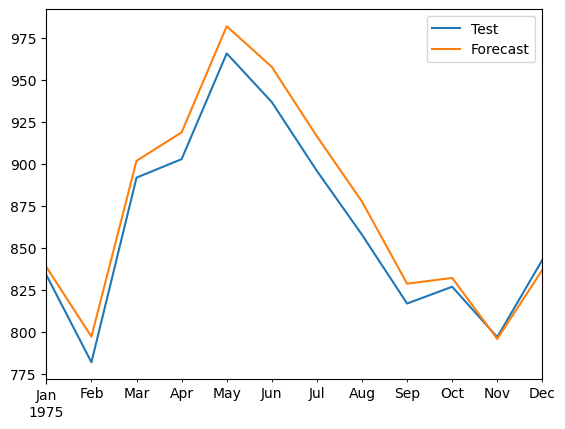

In [53]:
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

In [54]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3,stepwise=False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1203.992, Time=0.33 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1218.753, Time=0.56 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1186.787, Time=1.62 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1160.900, Time=3.57 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1127.042, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.47 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1123.440, Time=0.50 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1094.904, Time=3.79 sec
 ARIMA(0,0,1)(2,1,0)[12] 

In [55]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

13.941102797547243

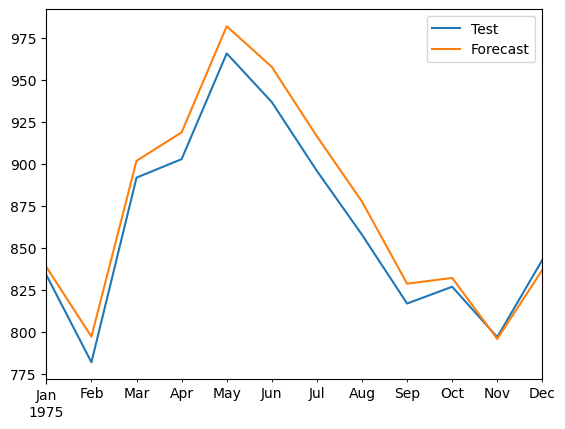

In [56]:
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

## BUNDESBANK-BBK01_WT5511 dataset

In [62]:
bank = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv',index_col=0)

In [63]:
bank.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [64]:
y = bank['Value']
y_train = bank[:-12]
y_test = bank[-12:]

In [65]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.78 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=5.48 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=6.58 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.55 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=4.10 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=5.04 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.59 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [66]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

106.01078934580089

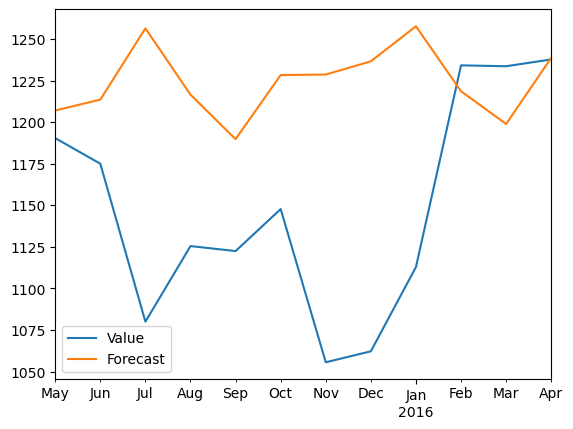

In [67]:
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

## Aus - Gas Dataset

In [70]:
gas = pd.read_csv('AusGas.csv',index_col=0)

In [71]:
gas

,GasProd
Month,
Jan-1956,1709
Feb-1956,1646
Mar-1956,1794
Apr-1956,1878
May-1956,2173
...,...
Apr-1995,49013
May-1995,56624
Jun-1995,61739


In [83]:
y = gas['GasProd']
y_train = y[:-12]
y_test = y[-12:]

#### ARIMA

In [84]:
model = ARIMA(y_train , order = (1,0,1),freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaco

13112.703431684791

#### SARIMA

In [85]:
model = ARIMA(y_train , order = (3,1,0),freq='MS',seasonal_order=(1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)


C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaco

3438.0890043599966

#### pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.010, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8327.013, Time=1.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.177, Time=1.10 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.659, Time=1.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.271, Time=1.11 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.858, Time=1.91 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

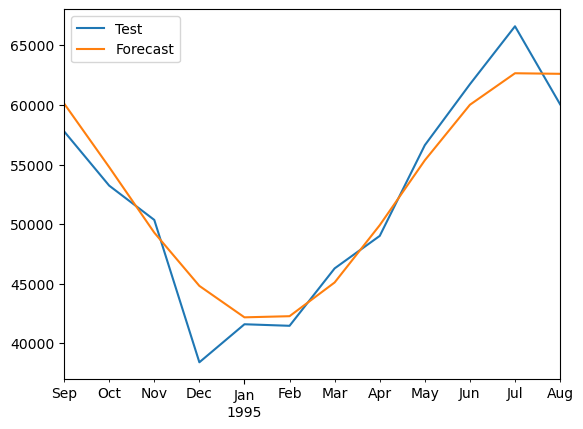

In [76]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True)
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

#### SARIMA (auto)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=1.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.932, Time=2.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.75 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.659, Time=3.73 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8208.277, Time=3.95 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.62 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.48 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

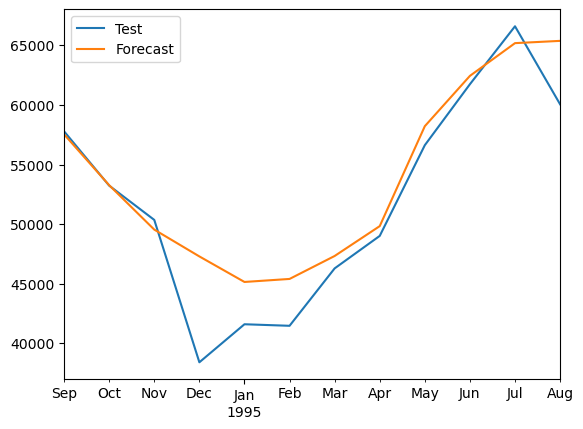

In [80]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3)
y_pred = model.predict(n_periods=len(y_test))
print(root_mean_squared_error(y_test,y_pred))
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

#### Holts 

In [81]:
from statsmodels.tsa.api import Holt

In [82]:
holt = Holt(y_train)
alpha , beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


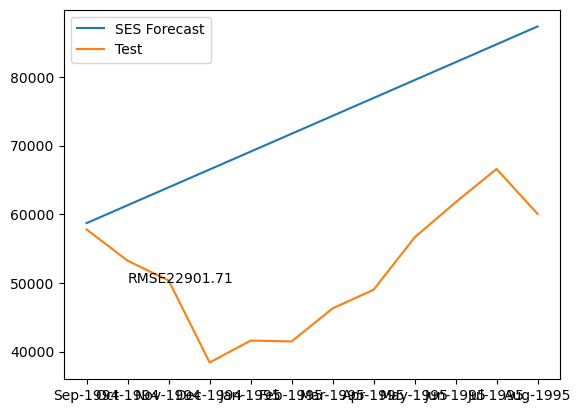

In [95]:
holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast) ,2)
plt.text(1,50000,"RMSE"+str(error))
plt.plot(holt_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

In [88]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


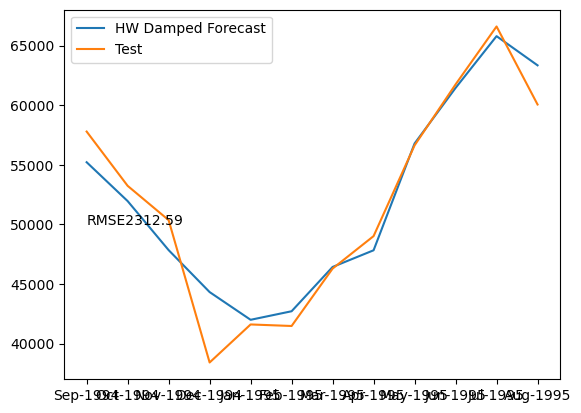

In [94]:
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul',damped_trend=True)
fit3 = hw_ml.fit()
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
plt.text(0,50000,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

## sales-of-shampoo-over-a-three-year dataset

In [99]:
sales = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv',index_col=0)

In [100]:
sales.head()

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [102]:
y = sales['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]

ARIMA

In [103]:
model = ARIMA(y_train , order = (1,0,1),freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


200.5010837570953

SARIMA

In [104]:
model = ARIMA(y_train , order = (3,1,0),freq='MS',seasonal_order=(1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)


C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


154.24297504547368

pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.212 seconds


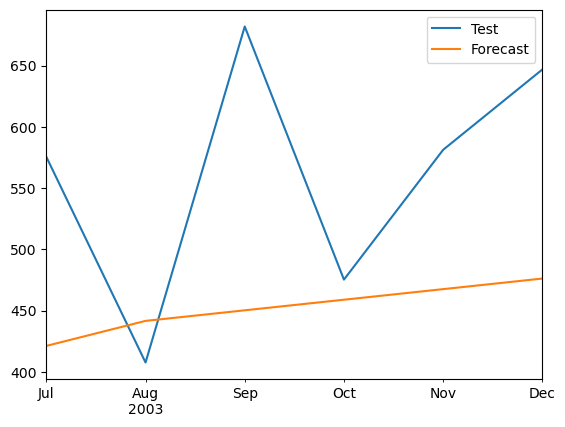

In [105]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True)
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

SARIMA (auto)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.79 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.85 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.29 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.59 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

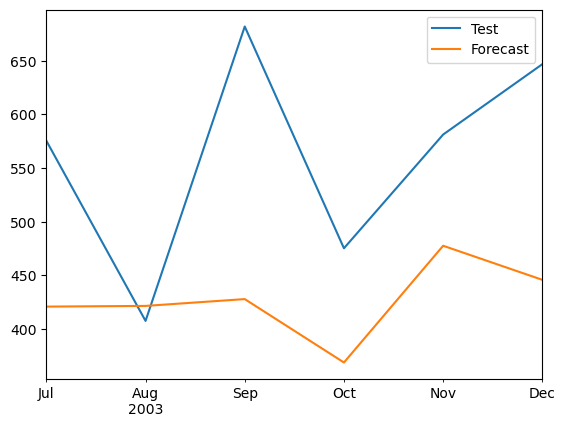

In [106]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3)
y_pred = model.predict(n_periods=len(y_test))
print(root_mean_squared_error(y_test,y_pred))
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

## WGEM-IND_CPTOTNSXN dataset

In [114]:
wg = pd.read_csv('WGEM-IND_CPTOTNSXN.csv',index_col=0)

In [115]:
wg.head()

,Value
Date,
31-12-1987,19.448655
31-12-1988,21.274000
31-12-1989,21.967677
31-12-1990,23.939126
31-12-1991,27.259261


In [117]:
y = wg['Value']
y_train = wg[:-4]
y_test = wg[-4:]
y_train.shape , y_test.shape

((27, 1), (4, 1))

In [118]:
result = adfuller(y,maxlag=10)
print("P-value",result[1])
if result[1]<0.05:
    print("Time series is stationary")
else:
    print("Time series is not stationary")

P-value 1.0
Time series is not stationary


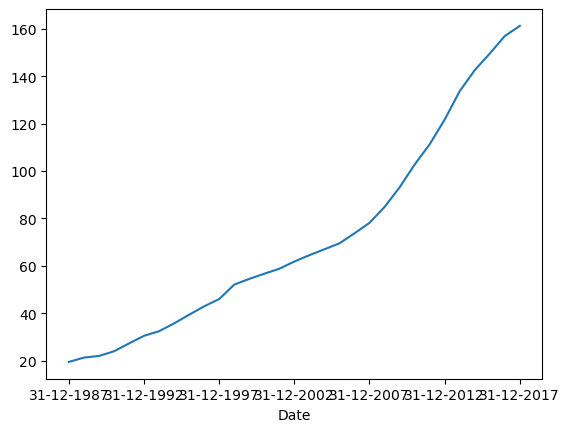

In [119]:
y.plot()
plt.show()

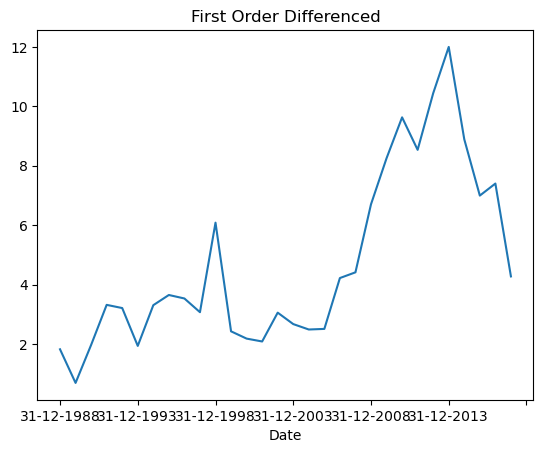

In [125]:
y.diff()[1:].plot()
plt.title('First Order Differenced')
plt.show()

In [126]:
from statsmodels.graphics.tsaplots import plot_acf

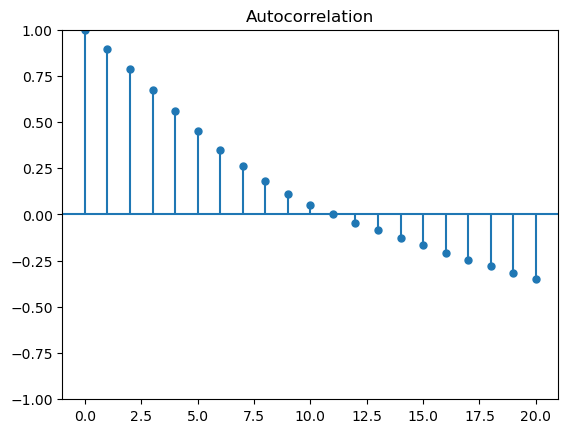

In [127]:
plot_acf(y,lags=20,alpha=None)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.901 seconds


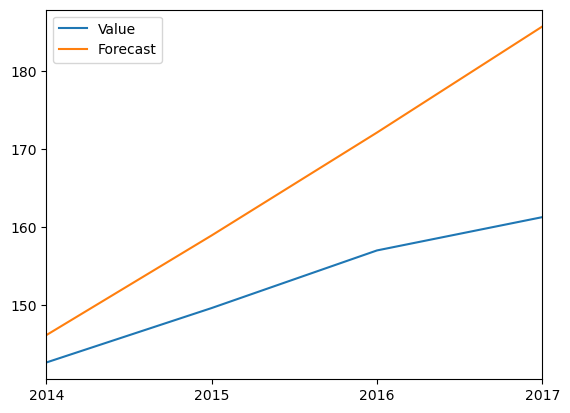

In [128]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True)
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=93.209, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=92.839, Time=0.14 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=91.252, Time=0.08 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=90.845, Time=0.13 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=92.839, Time=0.16 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=91.382, Time=0.22 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 5.210 seconds
12.346334442793342


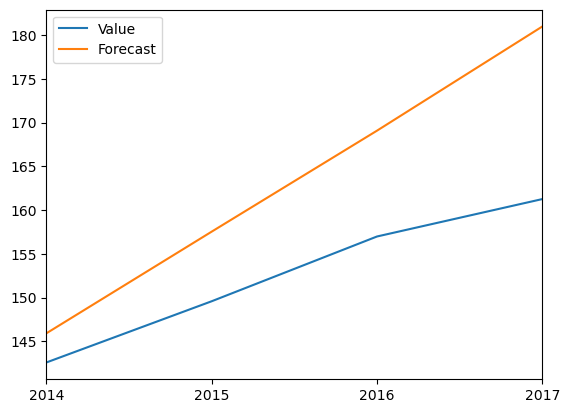

In [129]:
model = auto_arima(y_train,trace=True,error_action='ignore',suppress_warnings=True,seasonal=True,m=12,max_d=3)
y_pred = model.predict(n_periods=len(y_test))
print(root_mean_squared_error(y_test,y_pred))
y_test.index=y_pred.index
y_test.plot(label='Test')
y_pred.plot(label='Forecast')
plt.legend()
plt.show()